In [35]:
import sys
sys.path.insert(0, '/home/jianx/search-exposure/')
from network import DSSM
from train import train
from load_data import load
from gpu_allocator import select_device
from gpu_allocator import cleanup_gpu_list
import torch
import csv
from test import test
from test import test_loader
from test import get_ndcg_precision_rr
import random
from train import generate_sparse

In [8]:
num_epochs = 2
epoch_size = 100
batch_size = 100
learning_rate = 0.1
embed_size = 128

print("Num of epochs:", num_epochs)
print("Epoch size:", epoch_size)
print("Batch size:", batch_size)
print("Learning rate:", learning_rate)
print("Embedding size:", embed_size)
rank = 10
test_batch =43
MODEL_PATH = "/home/jianx/data/results/"

Num of epochs: 2
Epoch size: 100
Batch size: 100
Learning rate: 0.1
Embedding size: 128


In [4]:
print("Loading data")
pos_neg_dict, query_dict, passage_dict, top_dict, rating_dict, query_test_dict = load()
print("Data successfully loaded.")
print("Positive Negative Pair dict size: " + str(len(pos_neg_dict)))
print("Num of queries: " + str(len(query_dict)))
print("Num of passages: " + str(len(passage_dict)))

Loading data
Data successfully loaded.
Positive Negative Pair dict size: 400782
Num of queries: 808731
Num of passages: 8841823


In [31]:
CURRENT_DEVICE = torch.device("cuda:0")
net = torch.load("/home/jianx/data/results/100_1500_1000_0.1_512.model").to(CURRENT_DEVICE)

In [32]:
result_dict = test_loader(net, CURRENT_DEVICE, test_batch, top_dict, query_test_dict, passage_dict, rating_dict)
qids = list(result_dict.keys())

(array([935.,   3.,   4.,   1.,   1.,   2.,   0.,   0.,   2.,  52.]),
 array([-9.99984205e-01, -7.99987060e-01, -5.99989915e-01, -3.99992770e-01,
        -1.99995625e-01,  1.51991844e-06,  1.99998665e-01,  3.99995810e-01,
         5.99992955e-01,  7.99990100e-01,  9.99987245e-01]),
 <a list of 10 Patch objects>)

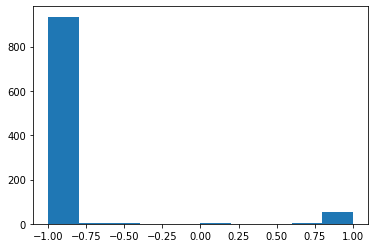

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

result0 = pd.DataFrame.from_dict(sorted(result_dict[qids[4]].items(), key=lambda x: (x[1], [-1, 1][random.randrange(2)]), reverse=True))
plt.hist(result0[1])

In [34]:
import numpy as np
result_ndcg = []
result_prec = []
result_rr = []
for qid in qids:
    ndcg, prec, rr = get_ndcg_precision_rr(rating_dict[qid], result_dict[qid], rank)
    result_ndcg.append(ndcg)
    result_prec.append(prec)
    result_rr.append(rr)
avg_ndcg = np.nanmean(result_ndcg)
avg_prec = np.nanmean(result_prec)
avg_rr = np.nanmean(result_rr)
print(avg_ndcg,avg_prec,avg_rr)

0.5865700222609527 0.12325581395348839 0.24886663230533868


In [40]:
test_qid = 1133167
test_pid = 6112590
test_q_embed = net(generate_sparse(query_test_dict[test_qid]).to(CURRENT_DEVICE)).detach()
test_p_embed = net(generate_sparse(passage_dict[test_pid]).to(CURRENT_DEVICE)).detach()
test_score = torch.cosine_similarity(test_q_embed.unsqueeze(0), test_p_embed.unsqueeze(0)).item()
print(test_score)
print(test_p_embed)

print(test_q_embed)

-0.9994208216667175
tensor([-1.0751e+04,  4.6317e+02, -1.2200e+03,  1.8497e+04,  1.8291e+04,
         1.5264e+04,  2.0334e+03, -1.2133e+04, -2.1925e+03, -8.8389e+03,
        -2.0581e+04,  2.4678e+03, -1.8493e+04, -1.5827e+03, -1.8489e+04,
         2.1828e+03,  1.2090e+04, -1.3956e+03, -8.8870e+02, -5.2778e+03,
         1.7776e+01, -1.2572e+04, -7.6011e+03,  9.5940e+01,  7.7317e+02,
        -1.8547e+04,  1.5836e+04, -2.2948e+04,  2.1258e+04, -4.5492e+01,
         7.7882e+01, -1.7072e+04, -2.2376e+04,  1.7240e+03,  2.5023e+02,
         9.6065e+02,  3.4993e+03,  1.0552e+04, -3.6850e+02, -2.0624e+03,
         3.3472e+03,  1.4395e+02,  5.0876e+03,  6.3516e+03, -8.5871e+03,
         8.8725e+02,  1.6944e+04,  3.5645e+03,  1.1952e+03, -3.9966e+03,
        -8.6056e+03, -2.1117e+04, -1.2178e+02,  1.4957e+04, -7.1066e+03,
        -8.1498e+03,  1.9317e+04,  4.1564e+02,  1.7988e+03, -2.0500e+04,
         1.0768e+04, -3.1889e-01, -2.4680e+03, -2.6547e+03,  2.8252e+03,
         8.8649e+02,  6.7671e+0